## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2021.

# Task 1: XNOR

In [2]:
# Import modules
from __future__ import print_function
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2
print(tf.__version__)

2.4.0


##  Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (-1, 2)_, ground truth _(g1, g2) = (0, 1), h0 = 0, and (wx, wh, b1, w, b2) = (3, 1, 2, -1, 1)_, **compute _(dwx, dwh, db1, dw, db2)_**, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

* Show all of your derivations and the computational process.
* Use LATEX to edit the equations (Jupyter notebook can recognize the basic LATEX syntax). Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

<span style="color:red">Solution:</span>

**[fill in here: Enter your derivations and the computational process]**


$$
Define\ sigmoid\ function:\    \sigma (x)=\frac{1}{1+e^{-x}}
$$

$$
Dirivative\ of\ the\ sigmoid\ function:\    d\sigma(x)=\sigma(x)(1-\sigma(x))
$$

$$
Loss\ function:\    L=\frac{1}{2} \sum_{i} (y_i-g_i)^2
$$

<br>

$$
\frac{\partial L}{\partial y_1}=y_1-g_1
$$

$$
\frac{\partial y_1}{\partial w}=\frac{\partial \sigma(w*h_1+b_2)}{\partial w}*h_1=d\sigma(w*h_1+b_2)*h_1
$$

$$
\frac{\partial y_1}{\partial b_2}=\frac{\partial \sigma(w*h_1+b_2)}{\partial w}=d\sigma(w*h_1+b_2)
$$

$$
\frac{\partial y_1}{\partial h_1}=\frac{\partial \sigma(w*h_1+b_2)}{\partial w}*w=d\sigma(w*h_1+b_2)*w
$$

<br>

$$
\frac{\partial h_1}{\partial wx}=\frac{\partial \sigma(wx*x_1+wh*h_0+b_1)}{\partial wx}*x_1=d\sigma(wx*x_1+wh*h_0+b_1)*x_1
$$

$$
\frac{\partial h_1}{\partial wh}=\frac{\partial \sigma(wx*x_1+wh*h_0+b_1)}{\partial wh}*h_0=d\sigma(wx*x_1+wh*h_0+b_1)*h_0
$$

$$
\frac{\partial h_1}{\partial b_1}=\frac{\partial \sigma(wx*x_1+wh*h_0+b_1)}{\partial b_1}=d\sigma(wx*x_1+wh*h_0+b_1)
$$

<br>

$$
\frac{\partial L}{\partial y_2}=y_2-g_2
$$

$$
\frac{\partial y_2}{\partial w}=\frac{\partial \sigma(w*h_2+b_2)}{\partial w}*h_2=d\sigma(w*h_2+b_2)*h_2
$$

$$
\frac{\partial y_2}{\partial b_2}=\frac{\partial \sigma(w*h_2+b_2)}{\partial w}=d\sigma(w*h_2+b_2)
$$

$$
\frac{\partial y_2}{\partial h_2}=\frac{\partial \sigma(w*h_2+b_2)}{\partial w}*w=d\sigma(w*h_2+b_2)*w
$$

<br>

$$
\frac{\partial h_2}{\partial wx}=\frac{\partial \sigma(wx*x_2+wh*h_1+b_1)}{\partial wx}*x_1=d\sigma(wx*x_2+wh*h_1+b_1)*(x_2+wh*\frac{\partial h_1}{\partial wx})
$$

$$
\frac{\partial h_2}{\partial wh}=\frac{\partial \sigma(wx*x_2+wh*h_1+b_1)}{\partial wh}*x_1=d\sigma(wx*x_2+wh*h_1+b_1)*(h_1+wh*\frac{\partial h_1}{\partial wh})
$$

$$
\frac{\partial h_2}{\partial b_1}=\frac{\partial \sigma(wx*x_2+wh*h_1+b_1)}{\partial b_1}=d\sigma(wx*x_2+wh*h_1+b_1)*(1+wh*\frac{\partial h_1}{\partial b_1})
$$

<br>

$$
\frac{\partial L}{\partial w}=\frac{\partial L}{\partial y_1}*\frac{\partial y_1}{\partial w}+\frac{\partial L}{\partial y_2}*\frac{\partial y_2}{\partial w}
$$

$$
\frac{\partial L}{\partial b_2}=\frac{\partial L}{\partial y_1}*\frac{\partial y_1}{\partial b_2}+\frac{\partial L}{\partial y_2}*\frac{\partial y_2}{\partial b_2}
$$

$$
\frac{\partial L}{\partial wx}=\frac{\partial L}{\partial y_1}*\frac{\partial y_1}{\partial h_1}*\frac{\partial h_1}{\partial wx}+\frac{\partial L}{\partial y_2}*\frac{\partial y_2}{\partial h_2}*\frac{\partial h_2}{\partial wx}
$$

$$
\frac{\partial L}{\partial wh}=\frac{\partial L}{\partial y_1}*\frac{\partial y_1}{\partial h_1}*\frac{\partial h_1}{\partial wh}+\frac{\partial L}{\partial y_2}*\frac{\partial y_2}{\partial h_2}*\frac{\partial h_2}{\partial wh}
$$

$$
\frac{\partial L}{\partial b_1}=\frac{\partial L}{\partial y_1}*\frac{\partial y_1}{\partial h_1}*\frac{\partial h_1}{\partial b_1}+\frac{\partial L}{\partial y_2}*\frac{\partial y_2}{\partial h_2}*\frac{\partial h_2}{\partial b_1}
$$

In [2]:
# use tensorflow to verify the answer.
with tf.GradientTape() as G:
    w = tf.Variable(-1.0)
    b2 = tf.Variable(1.0)
    wx = tf.Variable(3.0)
    wh = tf.Variable(1.0)
    b1 = tf.Variable(2.0)

    h0 = tf.Variable(0.0)
    x = tf.Variable((-1.0,2.0))
    g = tf.Variable((0.0, 1.0))

    y = []
    h1 = tf.sigmoid(wx*x[0] + wh*h0 + b1)
    y.append(tf.sigmoid(w*h1 + b2))
    h2 = tf.sigmoid(wx*x[1] + wh*h1 + b1)
    y.append(tf.sigmoid(w*h2 + b2))

    loss = 0.5*(tf.square(g[0]-y[0]) + tf.square(g[1]-y[1]))

    dw_t, db2_t, dwx_t, dwh_t, db1_t = G.gradient(loss, [w, b2, wx, wh, b1])
    

print("Verified by tensorflow (TODO compare values with your hand-written calculations):")
print("dw = {:.4f}, db2 = {:.4f}, dwx = {:.4f}, dwh = {:.4f}, db1 = {:.4f}".format(dw_t, db2_t, dwx_t, dwh_t, db1_t))

Verified by tensorflow (TODO compare values with your hand-written calculations):
dw = -0.0851, db2 = 0.0231, dwx = 0.0292, dwh = 0.0000, db1 = -0.0291


In [3]:
import math
h0 = 0

x1 = -1
x2 = 2

wx = 3
wh = 1
b1 = 2

w = -1
b2 = 1

g1 = 0
g2 = 1

def sig(x):
    return 1/(1+math.exp(-x))

def d_sig(x):
    return sig(x)*(1-sig(x))

def layer1(x,h):
    return sig(wx*x+wh*h+b1)
    
def layer2(h):
    return sig(w*h+b2)

h1 = layer1(x1,h0)
y1 = layer2(h1)

h2 = layer1(x2,h1)
y2 = layer2(h2)

# print(h1,y1,h2,y2)

dL_y1 = y1-g1
dy1_b2 = d_sig(w*h1+b2)
dy1_w = dy1_b2*h1
dy1_h1 = dy1_b2*w

dh1_b1 = d_sig(wx*x1+wh*h0+b1)
dh1_wx = dh1_b1*x1
dh1_wh = dh1_b1*h0

dL_y2 = y2-g2
dy2_b2 = d_sig(w*h2+b2)
dy2_w = dy2_b2*h2
dy2_h2 = dy2_b2*w

dh2_b1 = d_sig(wx*x2+wh*h1+b1)*(wh*dh1_b1+1)
dh2_wx = d_sig(wx*x2+wh*h1+b1)*(wh*dh1_b1+x2)
dh2_wh = d_sig(wx*x2+wh*h1+b1)*(wh*dh1_b1+h1)

dL_w = dL_y1*dy1_w + dL_y2*dy2_w
dL_b2 = dL_y1*dy1_b2 + dL_y2*dy2_b2

dL_wx = dL_y1*dy1_h1*dh1_wx + dL_y2*dy2_h2*dh2_wx
dL_wh = dL_y1*dy1_h1*dh1_wh + dL_y2*dy2_h2*dh2_wh
dL_b1 = dL_y1*dy1_h1*dh1_b1 + dL_y2*dy2_h2*dh2_b1

print(dL_w)
print(dL_b2)
print(dL_wx)
print(dL_wh)
print(dL_b1)
print('Is derivative of w correct? {}'.format(np.allclose(dw_t, dL_w, atol=1e-2)))
print('Is derivative of b2 correct? {}'.format(np.allclose(db2_t, dL_b2, atol=1e-2)))
print('Is derivative of wx correct? {}'.format(np.allclose(dwx_t, dL_wx, atol=1e-2)))
print('Is derivative of wh correct? {}'.format(np.allclose(dwh_t, dL_wh, atol=1e-2)))
print('Is derivative of b1 correct? {}'.format(np.allclose(db1_t, dL_b1, atol=1e-2)))


-0.08512777681556812
0.023093510510468193
0.029184146015738717
1.4908897860482452e-05
-0.02907548128903867
Is derivative of w correct? True
Is derivative of b2 correct? True
Is derivative of wx correct? True
Is derivative of wh correct? True
Is derivative of b1 correct? True


## Part 2: Use TensorFlow modules to create XNOR network

In this part, you need to build and train an XNOR network that can learn the XNOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XNOR network

XNOR network can learn the XNOR ($\odot$) function

As shown in the figure below, and for instance, if input $(x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7)$=(0,0,1,1,1,1,1,0), then output $(y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8)$=(1,1,0,1,0,1,0,0). That is, $y_n = x_0\odot x_1 \odot ... \odot x_{n-1}\odot x_{n}$

![xnor_net](./img/xnor.png)

### Create a data set
This function provides a way to generate the data which is needed for the training process. You should utilize it when building your training function for the GRU. Read the source code for more information.

In [2]:
from utils.xnor.dataset import create_xnor_dataset

In [3]:
create_xnor_dataset(1)

(array([[[0],
         [0],
         [0],
         [1],
         [0],
         [0],
         [1],
         [1]]]),
 array([[0, 0, 0, 1, 1, 1, 0, 1]]))

### Build a network using a TensorFlow LSTMCell and GRUCell
In this section, you are asked to build a XNOR net using a TensorFlow LSTMCell and a GRUCell. In TensorFlow 2, these two cells are supported by Keras. Please check online documents below.

Reference: 
1. [TensorFlow(Keras): Working with RNNs](https://keras.io/guides/working_with_rnns/)
2. [TensorFlow: Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn)
3. [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
4. [TensorFlow GRU cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)
5. [TensorFlow: Sequential Model](https://www.tensorflow.org/guide/keras/sequential_model)


<span style="color:red">TODO:</span>
Use TensorFlow to build and train your XNOR net. The dataset is already provided. You will do the following:
- Learn how to use **tf.keras.layers.LSTM** and **tf.keras.layers.GRU** in TensorFlow(Keras). 
- Choose appropriate parameters to build a model (Sequential Model in Keras is suggested). 
- Compile your model with appropriate loss function, optimizer, metrics, etc.
- Train your model and see the loss history.

Tips: 
1. Make sure that the shape of your data is corrrect after every step.
2. Choose your loss function according to your network design.
3. Choose 'accuracy' as your metrics when compiling your model.
4. Make sure that names of history for the network with LSTMCell and GRUCell (which you used while training) are the same as the ones in the plotting functions.
4. Feel free to ask TAs if you get stuck somewhere.

### Build a network with LSTM cell

In [4]:
in_data, out_data = create_xnor_dataset(1000) # create a dataset with a batch size of 1000

In [5]:
print(in_data.shape, out_data.shape)
print(type(in_data[0][0][0]), type(out_data[0][0]))

(1000, 8, 1) (1000, 8)
<class 'numpy.int64'> <class 'numpy.int64'>


In [44]:
###################################################
# TODO: build a network with LSTM cell and train it.#
#                                                 #
###################################################
import tensorflow.keras.layers as layers
import tensorflow.keras as keras

model_lstm = tf.keras.Sequential()

model_lstm.add(layers.Input(shape=(8,1)))

model_lstm.add(layers.LSTM(1024, return_sequences=True))

# model_lstm.add(layers.Flatten())

model_lstm.add(layers.Dense(1024, activation='sigmoid'))

# model_lstm.add(layers.Dense(64, activation='relu'))

model_lstm.add(layers.Dense(1, activation='sigmoid'))

model_lstm.summary()

optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model_lstm.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=optimizer,
    metrics=["accuracy"]
)

history_LSTM = model_lstm.fit(in_data, out_data, batch_size=64, epochs=30)

###################################################
# END TODO                                        #
###################################################

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 8, 1024)           4202496   
_________________________________________________________________
dense_67 (Dense)             (None, 8, 1024)           1049600   
_________________________________________________________________
dense_68 (Dense)             (None, 8, 1)              1025      
Total params: 5,253,121
Trainable params: 5,253,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 2s 12ms/step - loss: 0.2511 - accuracy: 0.5247
Epoch 2/30
16/16 [==============================] - 0s 10ms/step - loss: 0.2486 - accuracy: 0.5368
Epoch 3/30
16/16 [==============================] - 0s 9ms/step - loss: 0.2472 - accuracy: 0.5543
Epoch 4/30
16/16 [==============================] - 0s 9ms/step - loss: 0.247

#### Hint for creating a model with LSTM cells
```
model = tf.keras.Sequential() 
model.add(# insert layer 1)
model.add(# insert layer 2) 
model.add(# insert more layers) 
model.add(# insert output layer)

model.summary() 
model.compile(loss=#choose your loss function,
              optimizer=#choose your optimizer with learning rate,
              metrics=['accuracy']) 
history_LSTM = model.fit(in_data, out_data, batch_size=64, epochs=15) 
```

### Build a network with GRU cell

In [9]:
in_data, out_data = create_xnor_dataset(1000) # create a dataset with batch size of 1000

In [41]:
###################################################
# TODO: build a model with GRU cell and train it. #
#                                                 #
###################################################
model_gru = tf.keras.Sequential()

# model_gru.add(layers.Input(shape=(8,1)))

model_gru.add(layers.GRU(1024, return_sequences=True))

model_gru.add(layers.Dense(1024, activation='sigmoid'))
# model_gru.add(layers.Dense(64, activation='relu'))

model_gru.add(layers.Dense(1, activation='sigmoid'))

model_gru.build((None, 8, 1))

model_gru.summary()



optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model_gru.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=optimizer,
    metrics=["accuracy"]
)

history_GRU = model_gru.fit(in_data, out_data, batch_size=64, epochs=30)

###################################################
# END TODO                                        #
###################################################

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_14 (GRU)                 (None, 8, 1024)           3154944   
_________________________________________________________________
dense_65 (Dense)             (None, 8, 1024)           1049600   
_________________________________________________________________
dense_66 (Dense)             (None, 8, 1)              1025      
Total params: 4,205,569
Trainable params: 4,205,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 1s 11ms/step - loss: 0.2510 - accuracy: 0.5216
Epoch 2/30
16/16 [==============================] - 0s 10ms/step - loss: 0.2475 - accuracy: 0.5633
Epoch 3/30
16/16 [==============================] - 0s 8ms/step - loss: 0.2478 - accuracy: 0.5513
Epoch 4/30
16/16 [==============================] - 0s 7ms/step - loss: 0.246

#### Hint for creating a model with GRU cell
```
model = tf.keras.Sequential()
model.add(# insert layer 1)
model.add(# insert layer 2)
model.add(# insert more layers)
model.add(# insert output layer)

model.summary()
model.compile(loss=#choose your loss function,
              optimizer=#choose your optimizer with learning rate,
              metrics=['accuracy'])
history_GRU = model.fit(in_data, out_data, batch_size=64, epochs=15)
```

### Visualize loss and accuracy

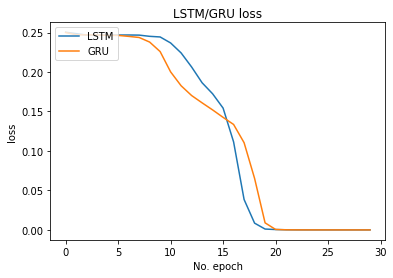

In [45]:
plt.plot(history_LSTM.history['loss'], label='LSTM')
plt.plot(history_GRU.history['loss'], label='GRU')
plt.title('LSTM/GRU loss')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

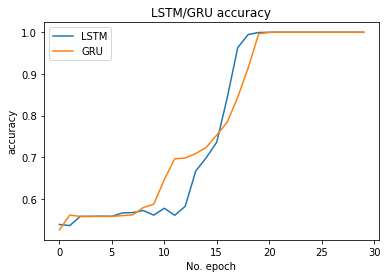

In [46]:
plt.plot(history_LSTM.history['accuracy'], label='LSTM')
plt.plot(history_GRU.history['accuracy'], label='GRU')
plt.title('LSTM/GRU accuracy')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

<span style="color:red">__TODO:__</span> Answer the question:

Which part of this task have you been struggling with most of the  time? Describe how you resolved it.

<span style="color:red">__SOLUTION:__</span>

Making the LSTM or GRU more accurate is kind of struggle for me. 
Firstly I constructed a very simple model, which is a narrow LSTM followed a  narrow Dense layer. And the accuracy is lower than 0.1. 
Then I tried to increase the number of nodes in the hidden layer and number of sequence of LSTM. The result starts getting better but still very poor. I found that the loss of the model is not descending from epochs to epochs, so I adjusted learning rate and changed the optimizor from SGD to Adam, which make the performance.
Also, the activation function of the last layer should be sigmoid for making the result in the range of (-1,1), which matches the target.
Finally, I tried several times and made the model deeper and wider.

<span style="color:red">__TODO:__</span> Answer the question:

Which loss function did you use? Why?

<span style="color:red">__SOLUTION:__</span>

I used MeanSquaredError as the loss function. Because the task is to make the result as near to the target as possible, and not a classification task. MeanSquaredError mesures the distance error between the result and target.

## Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality (including different types of gates that constitute the cell).

You should refer to the materials on how the LSTM cell works  - with its cell states, activation functions and kernels. 
<br>Please see the course slides or the website https://colah.github.io/posts/2015-08-Understanding-LSTMs/.

<span style="color:red">TODO:</span> 
1. Complete the function **LSTM_step** in utils/xnor/LSTM_step.py;
2. Verify the function by running the provided code.
3. Use the same way (as described above) to build the model and to train it.


In [3]:
from utils.xnor.LSTM_step import LSTM_step

cell_inputs = np.ones((1,1))
cell_states = [0.2*np.ones((1,64)), np.zeros((1,64))]
kernel = 0.1*np.ones((1,256))
recurrent_kernel = 0.1*np.ones((64,256))
bias = np.zeros(256)

h , [h,c] = LSTM_step(cell_inputs, cell_states, kernel, recurrent_kernel, bias)
print('Simple verification:')
print('Is h correct?', np.isclose(h.numpy()[0][0],0.48484358))
print('Is c correct?', np.isclose(c.numpy()[0][0],0.70387213))

Simple verification:
Is h correct? True
Is c correct? True


In [48]:
in_data, out_data = create_xnor_dataset(1000)# create a dataset with a batch size of 1000

In [51]:
###################################################
# TODO: build a model with LSTM cell and train it.#
#                                                 #
###################################################

model_lstm = tf.keras.Sequential()

model_lstm.add(layers.Input(shape=(8,1)))

model_lstm.add(layers.LSTM(1024, return_sequences=True))

# model_lstm.add(layers.Flatten())

model_lstm.add(layers.Dense(1024, activation='sigmoid'))

# model_lstm.add(layers.Dense(64, activation='relu'))

model_lstm.add(layers.Dense(1, activation='sigmoid'))

model_lstm.summary()

optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model_lstm.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=optimizer,
    metrics=["accuracy"]
)

history = model_lstm.fit(in_data, out_data, batch_size=64, epochs=30)

###################################################
# END TODO                                        #
###################################################

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 8, 1024)           4202496   
_________________________________________________________________
dense_73 (Dense)             (None, 8, 1024)           1049600   
_________________________________________________________________
dense_74 (Dense)             (None, 8, 1)              1025      
Total params: 5,253,121
Trainable params: 5,253,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 2s 13ms/step - loss: 0.2786 - accuracy: 0.5062
Epoch 2/30
16/16 [==============================] - 0s 9ms/step - loss: 0.2489 - accuracy: 0.5008
Epoch 3/30
16/16 [==============================] - 0s 9ms/step - loss: 0.2476 - accuracy: 0.5425
Epoch 4/30
16/16 [==============================] - 0s 9ms/step - loss: 0.2469

#### Hint for building a model with LSTM cell
```
model = tf.keras.Sequential()
model.add(# insert layer 1)
model.add(# insert layer 2)
model.add(# insert more layers)
model.add(# insert output layer)

model.summary()
model.compile(loss=#choose your loss function,
              optimizer=#choose your optimizer with learning rate,
              metrics=['accuracy'])
history = model.fit(in_data, out_data, batch_size=64, epochs=15)
```

### Visualize loss and accuracy

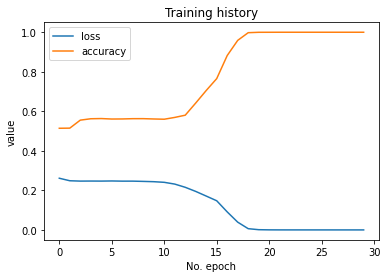

In [52]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Training history')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()